# DPS AI Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [2]:
Data_Frame = pd.read_csv("monatszahlen2209_verkehrsunfaelle.csv")
Data_Frame

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


# Cleaning the DataFrame

In [3]:
# keep the first 5 columns
Data_Frame = Data_Frame.iloc[:,:5]
Data_Frame

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [4]:
# Rename the columns we will be working on 
Data_Frame = Data_Frame.rename( columns = { 
    'MONATSZAHL' : 'Category',
    'AUSPRÄGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})
Data_Frame

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [5]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       2086 non-null   object 
 1   Accident_Type  2086 non-null   object 
 2   Year           2086 non-null   int64  
 3   Month          2086 non-null   object 
 4   Value          2002 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.6+ KB


In [6]:
Data_Frame.describe()

,Year,Value
count,2086.000000,2002.000000
mean,2010.963087,1434.433566
std,6.615227,4634.494223
min,2000.000000,0.000000
25%,2005.000000,41.000000
50%,2011.000000,394.000000
75%,2017.000000,863.250000
max,2022.000000,46988.000000


In [7]:
Data_Frame.isnull().sum()

Category          0
Accident_Type     0
Year              0
Month             0
Value            84
dtype: int64

The DataFrame has missing values. Let's check them

In [8]:
# Identify rows with NaN
rows_with_nan = Data_Frame[Data_Frame.isnull().any(axis=1)]
print(rows_with_nan)

             Category           Accident_Type  Year   Month  Value
0      Alkoholunfälle               insgesamt  2022  202201    NaN
1      Alkoholunfälle               insgesamt  2022  202202    NaN
2      Alkoholunfälle               insgesamt  2022  202203    NaN
3      Alkoholunfälle               insgesamt  2022  202204    NaN
4      Alkoholunfälle               insgesamt  2022  202205    NaN
...               ...                     ...   ...     ...    ...
1795  Verkehrsunfälle  Verletzte und Getötete  2022  202208    NaN
1796  Verkehrsunfälle  Verletzte und Getötete  2022  202209    NaN
1797  Verkehrsunfälle  Verletzte und Getötete  2022  202210    NaN
1798  Verkehrsunfälle  Verletzte und Getötete  2022  202211    NaN
1799  Verkehrsunfälle  Verletzte und Getötete  2022  202212    NaN

[84 rows x 5 columns]


All the missing values are the rows of 2022. It's not a problem because we are going to drop the records which come after 2020

In [9]:
# without 2021 and 2022
Data_Frame_2020 = Data_Frame.drop(Data_Frame[Data_Frame['Year'] > 2020].index)
Data_Frame_2020

,Category,Accident_Type,Year,Month,Value
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


# Historically number of accidents per category Visualization

In [10]:
# First, we create a dataframe with the number of accidents per year
Accidents = Data_Frame_2020[Data_Frame_2020['Month'] == 'Summe']
Accidents = Accidents[['Category', 'Year', 'Value']]
Accidents

,Category,Year,Value
25,Alkoholunfälle,2020,430.0
38,Alkoholunfälle,2019,434.0
51,Alkoholunfälle,2018,398.0
64,Alkoholunfälle,2017,409.0
77,Alkoholunfälle,2016,301.0
...,...,...,...
2021,Verkehrsunfälle,2004,6219.0
2034,Verkehrsunfälle,2003,6365.0
2047,Verkehrsunfälle,2002,7026.0
2060,Verkehrsunfälle,2001,7452.0


In [11]:
# Then, we create a dataframe for each category of accidents
Accidents_Alkoholunfälle = Accidents[Accidents['Category'] == 'Alkoholunfälle']
Accidents_Fluchtunfälle = Accidents[Accidents['Category'] == 'Fluchtunfälle']
Accidents_Verkehrsunfälle = Accidents[Accidents['Category'] == 'Verkehrsunfälle']

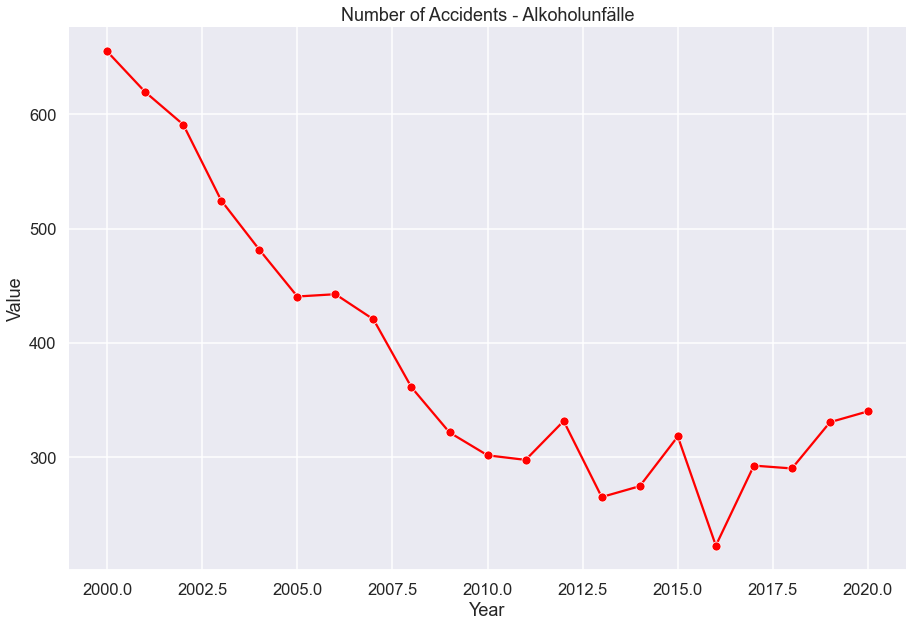

In [13]:
# Finally, we build a grap for each dataframe

plt.figure(figsize=(15,10))
sns.lineplot(x="Year", y="Value", data=Accidents_Alkoholunfälle, color="red", ci=None, markers=True, marker='o')

sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("Dark2")
sns.despine(left=True)
plt.title("Number of Accidents - Alkoholunfälle")
plt.xlabel("Year")
plt.ylabel("Value")

plt.show()

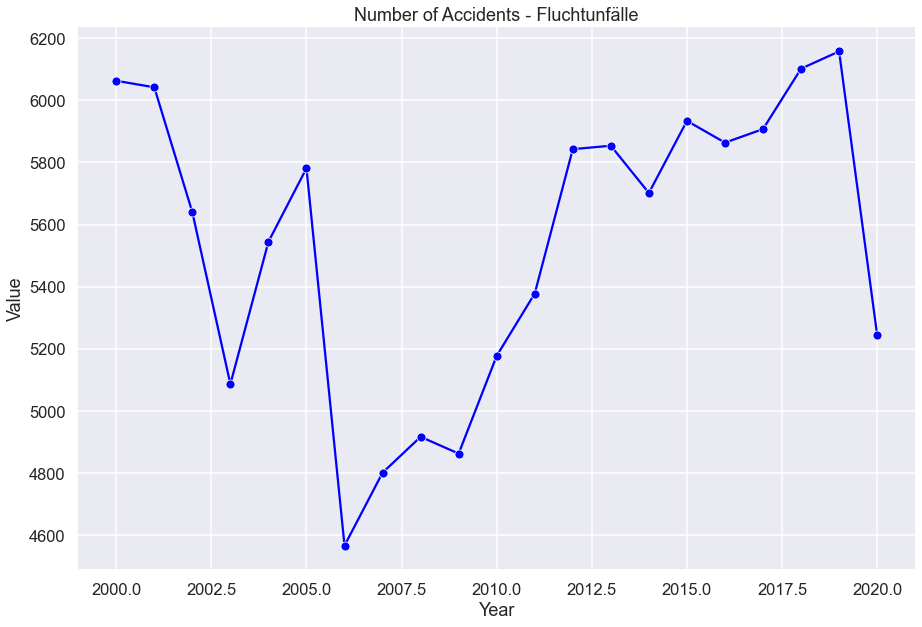

In [14]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Year", y="Value", data=Accidents_Fluchtunfälle, color="blue", ci=None, markers=True, marker='o')

sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("Dark2")
sns.despine(left=True)
plt.title("Number of Accidents - Fluchtunfälle")
plt.xlabel("Year")
plt.ylabel("Value")

plt.show()

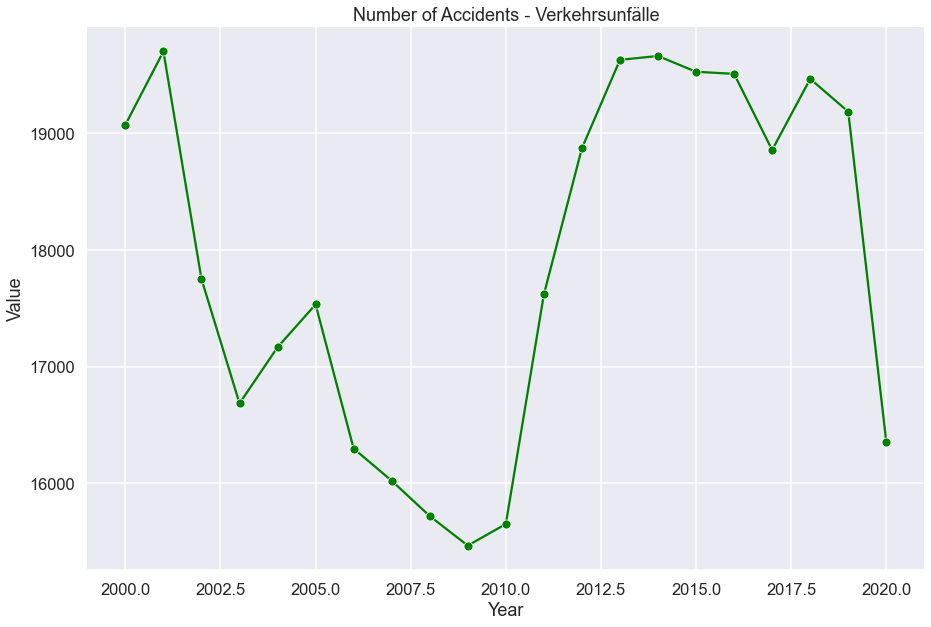

In [15]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Year", y="Value", data=Accidents_Verkehrsunfälle, color="green", ci=None, markers=True, marker='o')

sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("Dark2")
sns.despine(left=True)
plt.title("Number of Accidents - Verkehrsunfälle")
plt.xlabel("Year")
plt.ylabel("Value")

plt.show()

# Let's build a Regression Model

In [16]:
Data_Frame_2020 = Data_Frame_2020.drop(Data_Frame_2020[Data_Frame['Month'] == 'Summe'].index)
Data_Frame_2020

<ipython-input-16-ba957b7eab3b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_Frame_2020 = Data_Frame_2020.drop(Data_Frame_2020[Data_Frame['Month'] == 'Summe'].index)


,Category,Accident_Type,Year,Month,Value
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
30,Alkoholunfälle,insgesamt,2020,202005,40.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [17]:
Y = Data_Frame_2020['Value']
Y

26       28.0
27       40.0
28       27.0
29       26.0
30       40.0
        ...  
2081    647.0
2082    675.0
2083    615.0
2084    578.0
2085    515.0
Name: Value, Length: 1764, dtype: float64

In [18]:
X = Data_Frame_2020.drop('Value', axis=1)
X['Month']=X['Month'].apply(lambda x: x[-2:])
X

,Category,Accident_Type,Year,Month
26,Alkoholunfälle,insgesamt,2020,01
27,Alkoholunfälle,insgesamt,2020,02
28,Alkoholunfälle,insgesamt,2020,03
29,Alkoholunfälle,insgesamt,2020,04
30,Alkoholunfälle,insgesamt,2020,05
...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,08
2082,Verkehrsunfälle,Verletzte und Getötete,2000,09
2083,Verkehrsunfälle,Verletzte und Getötete,2000,10
2084,Verkehrsunfälle,Verletzte und Getötete,2000,11


As we are dealing with categorical data, we should try a One-Hot-Encoding

In [19]:
X_dummies = pd.get_dummies(X)
X_dummies

,Year,Category_Alkoholunfälle,Category_Fluchtunfälle,Category_Verkehrsunfälle,Accident_Type_Verletzte und Getötete,Accident_Type_insgesamt,Accident_Type_mit Personenschäden,Month_01,Month_02,Month_03,Month_04,Month_05,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12
26,2020,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
27,2020,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
28,2020,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
29,2020,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
30,2020,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,2000,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2082,2000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2083,2000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2084,2000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [20]:
dummies_columns = X_dummies.columns
dummies_columns

Index(['Year', 'Category_Alkoholunfälle', 'Category_Fluchtunfälle',
       'Category_Verkehrsunfälle', 'Accident_Type_Verletzte und Getötete',
       'Accident_Type_insgesamt', 'Accident_Type_mit Personenschäden',
       'Month_01', 'Month_02', 'Month_03', 'Month_04', 'Month_05', 'Month_06',
       'Month_07', 'Month_08', 'Month_09', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, Y, test_size=0.25, random_state=42)

In [22]:
regr = RandomForestRegressor(max_depth=None, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [26]:
r_squared = regr.score(X_test, y_test)
Param = regr.get_params()
print('Score R² :', r_squared)
print('--------')
print('Parameters : ',Param)

Score R² : 0.990704951268239
--------
Parameters :  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [27]:
# we can now save our model
joblib.dump(regr, 'RandomForest_regression_model_saved.joblib')

['RandomForest_regression_model_saved.joblib']